In [2]:
import pandas as pd

In [3]:
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
athletes

/Users/bradenwellman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:05
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:06
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:07
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,2015-03-25 09:55:07


In [27]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [5]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [11]:
import numpy as np

In [28]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,howlong,retrieved_datetime,train-crossfit,I workout mostly at a CrossFit Affiliate,"I workout mostly at home, work, or a traditional gym",I have a coach who determines my programming,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer
34057,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,6-12 months|,2015-03-01 22:51:30,False,1,1,1,1,1,1,0
34127,7292.0,Nick Ryan,Australia,Cfbb team,CrossFit Blackburn,Male,28.0,67.0,179.0,210.0,...,2-4 years|,2015-03-01 22:54:58,False,1,0,1,0,0,1,0
34153,2162.0,Matthew Swift,Australia,CrossFit Brisbane,CrossFit Brisbane,Male,45.0,70.0,187.0,148.0,...,4+ years|,2015-03-01 22:55:55,False,1,0,1,1,0,1,0
34154,7806.0,Ross Vivion,South West,Outcast CrossFit,Outcast CrossFit,Male,31.0,64.0,165.0,139.0,...,4+ years|,2015-03-01 22:55:56,False,1,0,0,0,0,0,0
34533,259585.0,Adam Trussell,North East,CrossFit EXP,CrossFit EXP,Male,32.0,76.0,219.0,300.0,...,1-2 years|,2015-03-01 23:12:30,False,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372328,22627.0,Keith McGuire,South East,FireBase Infidels,CrossFit FireBase,Male,55.0,73.0,185.0,295.0,...,4+ years|,2015-03-06 09:49:54,False,1,0,0,0,1,1,0
375133,103943.0,Robert Payton,South East,Crossfit Ambush,CrossFit Ambush,Male,56.0,66.0,171.0,447.0,...,1-2 years|,2015-03-06 10:16:51,False,1,0,0,0,1,0,0
380392,4932.0,Troy Straith,Canada West,CrossFit BC,CrossFit BC,Male,54.0,76.0,204.0,292.0,...,4+ years|,2015-03-06 10:59:23,False,1,0,1,0,1,1,0
382760,110296.0,Dennis Walczyk,South West,Colorado Springs Crossfit,CrossFit Colorado Springs,Male,36.0,72.0,225.0,198.0,...,2-4 years|,2015-03-06 11:19:07,False,0,1,0,1,0,1,0


In [29]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer,I played youth or high school level sports,I regularly play recreational sports,I played college sports,I played professional sports,I have no athletic background besides CrossFit,Decline to answer
34057,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
34127,7292.0,Nick Ryan,Australia,Cfbb team,CrossFit Blackburn,Male,28.0,67.0,179.0,210.0,...,0,0,1,0,1,1,0,0,0,0
34153,2162.0,Matthew Swift,Australia,CrossFit Brisbane,CrossFit Brisbane,Male,45.0,70.0,187.0,148.0,...,1,0,1,0,1,0,0,0,0,0
34154,7806.0,Ross Vivion,South West,Outcast CrossFit,Outcast CrossFit,Male,31.0,64.0,165.0,139.0,...,0,0,0,0,1,0,0,0,0,0
34533,259585.0,Adam Trussell,North East,CrossFit EXP,CrossFit EXP,Male,32.0,76.0,219.0,300.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372328,22627.0,Keith McGuire,South East,FireBase Infidels,CrossFit FireBase,Male,55.0,73.0,185.0,295.0,...,0,1,1,0,1,0,0,0,0,0
375133,103943.0,Robert Payton,South East,Crossfit Ambush,CrossFit Ambush,Male,56.0,66.0,171.0,447.0,...,0,1,0,0,1,1,0,0,0,0
380392,4932.0,Troy Straith,Canada West,CrossFit BC,CrossFit BC,Male,54.0,76.0,204.0,292.0,...,0,1,1,0,1,1,0,0,0,0
382760,110296.0,Dennis Walczyk,South West,Colorado Springs Crossfit,CrossFit Colorado Springs,Male,36.0,72.0,225.0,198.0,...,1,0,1,0,0,0,0,0,1,0


In [30]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I played professional sports,I have no athletic background besides CrossFit,Decline to answer,I began CrossFit by trying it alone (without a coach),I have completed the CrossFit Level 1 certificate course,I train other people,I have attended one or more specialty courses,I have had a life changing experience due to CrossFit,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer
34057,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
34127,7292.0,Nick Ryan,Australia,Cfbb team,CrossFit Blackburn,Male,28.0,67.0,179.0,210.0,...,0,0,0,1,1,1,1,0,0,0
34153,2162.0,Matthew Swift,Australia,CrossFit Brisbane,CrossFit Brisbane,Male,45.0,70.0,187.0,148.0,...,0,0,0,1,1,1,1,1,0,0
34154,7806.0,Ross Vivion,South West,Outcast CrossFit,Outcast CrossFit,Male,31.0,64.0,165.0,139.0,...,0,0,0,0,1,1,1,1,1,0
34533,259585.0,Adam Trussell,North East,CrossFit EXP,CrossFit EXP,Male,32.0,76.0,219.0,300.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372328,22627.0,Keith McGuire,South East,FireBase Infidels,CrossFit FireBase,Male,55.0,73.0,185.0,295.0,...,0,0,0,1,1,1,1,0,0,0
375133,103943.0,Robert Payton,South East,Crossfit Ambush,CrossFit Ambush,Male,56.0,66.0,171.0,447.0,...,0,0,0,1,0,0,0,0,1,0
380392,4932.0,Troy Straith,Canada West,CrossFit BC,CrossFit BC,Male,54.0,76.0,204.0,292.0,...,0,0,0,0,1,1,1,1,1,0
382760,110296.0,Dennis Walczyk,South West,Colorado Springs Crossfit,CrossFit Colorado Springs,Male,36.0,72.0,225.0,198.0,...,0,1,0,1,0,0,0,1,0,0


In [31]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer,I do multiple workouts in a day 3+ times a week,I typically rest fewer than 4 days per month,I typically rest 4 or more days per month,I usually only do 1 workout a day,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer
34057,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
34127,7292.0,Nick Ryan,Australia,Cfbb team,CrossFit Blackburn,Male,28.0,67.0,179.0,210.0,...,0,0,1,0,1,0,0,0,0,0
34153,2162.0,Matthew Swift,Australia,CrossFit Brisbane,CrossFit Brisbane,Male,45.0,70.0,187.0,148.0,...,0,0,1,0,1,0,0,0,0,0
34154,7806.0,Ross Vivion,South West,Outcast CrossFit,Outcast CrossFit,Male,31.0,64.0,165.0,139.0,...,1,0,0,0,0,1,1,0,0,0
34533,259585.0,Adam Trussell,North East,CrossFit EXP,CrossFit EXP,Male,32.0,76.0,219.0,300.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372328,22627.0,Keith McGuire,South East,FireBase Infidels,CrossFit FireBase,Male,55.0,73.0,185.0,295.0,...,0,0,0,1,0,0,0,0,0,0
375133,103943.0,Robert Payton,South East,Crossfit Ambush,CrossFit Ambush,Male,56.0,66.0,171.0,447.0,...,1,0,1,0,1,0,0,1,0,0
380392,4932.0,Troy Straith,Canada West,CrossFit BC,CrossFit BC,Male,54.0,76.0,204.0,292.0,...,1,0,0,0,1,0,0,1,1,0
382760,110296.0,Dennis Walczyk,South West,Colorado Springs Crossfit,CrossFit Colorado Springs,Male,36.0,72.0,225.0,198.0,...,0,0,0,0,1,1,0,0,0,0


In [12]:
athletes["train-crossfit"] = np.where("I workout" in athletes["train"], True, False)
# df['hasimage'] = np.where("I workout" in athletes["train"], True, False)

In [13]:
athletes.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime,train-crossfit
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,False
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,False
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN,False
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN,False


In [29]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [30]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people


In [31]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

In [32]:
#athletes.howlong.unique()

In [35]:
athletes.age.describe()

count    331110.000000
mean         32.516750
std           7.730671
min          13.000000
25%          27.000000
50%          31.000000
75%          37.000000
max         125.000000
Name: age, dtype: float64

In [36]:
athletes.height.describe()

count    1.598690e+05
mean     1.206217e+02
std      2.097995e+04
min      0.000000e+00
25%      6.600000e+01
50%      6.900000e+01
75%      7.200000e+01
max      8.388607e+06
Name: height, dtype: float64

In [37]:
athletes.weight.describe()

count    229890.000000
mean        170.896137
std          58.379799
min           1.000000
25%         145.000000
50%         170.000000
75%         192.000000
max       20175.000000
Name: weight, dtype: float64

In [38]:
 athletes.fran.describe()

count    5.542600e+04
mean     9.886691e+02
std      7.200430e+04
min      1.000000e+00
25%      2.150000e+02
50%      2.900000e+02
75%      3.920000e+02
max      8.388607e+06
Name: fran, dtype: float64

In [39]:
 athletes.helen.describe()

count    3.027900e+04
mean     1.207950e+03
std      6.824091e+04
min      1.000000e+00
25%      5.250000e+02
50%      5.950000e+02
75%      6.940000e+02
max      8.388607e+06
Name: helen, dtype: float64

In [40]:
 athletes.grace.describe()

count    4.074500e+04
mean     5.766025e+02
std      4.891145e+04
min     -6.000000e+01
25%      1.490000e+02
50%      1.930000e+02
75%      2.620000e+02
max      8.388607e+06
Name: grace, dtype: float64

In [41]:
 athletes.filthy50.describe()

count    1.935900e+04
mean     2.127863e+03
std      6.055021e+04
min      1.000000e+00
25%      1.308000e+03
50%      1.550000e+03
75%      1.809000e+03
max      8.388607e+06
Name: filthy50, dtype: float64

In [42]:
 athletes.fgonebad.describe()

count    2.973800e+04
mean     1.472252e+03
std      9.762688e+04
min      0.000000e+00
25%      2.400000e+02
50%      2.940000e+02
75%      3.360000e+02
max      8.388607e+06
Name: fgonebad, dtype: float64

In [43]:
 athletes.run400.describe()

count    2.224600e+04
mean     5.241279e+02
std      5.628804e+04
min      1.000000e+00
25%      6.200000e+01
50%      7.100000e+01
75%      8.400000e+01
max      8.388607e+06
Name: run400, dtype: float64

In [44]:
 athletes.run5k.describe()

count    3.609700e+04
mean     3.411464e+03
std      1.251980e+05
min      1.000000e+00
25%      1.242000e+03
50%      1.380000e+03
75%      1.560000e+03
max      8.388607e+06
Name: run5k, dtype: float64

In [45]:
 athletes.candj.describe()

count    1.044350e+05
mean     2.709107e+02
std      2.596882e+04
min     -4.500000e+01
25%      1.400000e+02
50%      1.950000e+02
75%      2.350000e+02
max      8.388607e+06
Name: candj, dtype: float64

In [46]:
 athletes.snatch.describe()

count    9.728000e+04
mean     2.424957e+02
std      2.708942e+04
min      0.000000e+00
25%      1.050000e+02
50%      1.450000e+02
75%      1.850000e+02
max      8.388607e+06
Name: snatch, dtype: float64

In [47]:
 athletes.deadlift.describe()

count    1.153230e+05
mean     6.970503e+02
std      5.523235e+04
min     -5.000000e+02
25%      2.550000e+02
50%      3.450000e+02
75%      4.150000e+02
max      8.388607e+06
Name: deadlift, dtype: float64

In [48]:
 athletes.backsq.describe()

count    1.105170e+05
mean     5.852109e+02
std      5.052976e+04
min     -7.000000e+00
25%      2.050000e+02
50%      2.750000e+02
75%      3.350000e+02
max      8.388607e+06
Name: backsq, dtype: float64

In [55]:
 athletes.pullups.describe()

count    5.060800e+04
mean     4.269613e+04
std      9.546078e+06
min     -6.000000e+00
25%      1.500000e+01
50%      2.700000e+01
75%      3.900000e+01
max      2.147484e+09
Name: pullups, dtype: float64

In [57]:
athletes[athletes.pullups > 1000]

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
5855,50693.0,Matt Cavallaro,Australia,CrossFit Conditioning Narrabeen,CrossFit Conditioning,Male,35.0,70.0,173.0,3348.0,...,1000.0,25.0,1.034000e+03,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I wor...,I regularly play recreational sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,4+ years|,NaN
8051,40813.0,Ian Daniel,NaN,NaN,NaN,Male,24.0,68.0,195.0,77.0,...,10000.0,8000.0,9.999900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41837,154136.0,Eric McCombs,South Central,Adino Warriors,CrossFit Adino,Male,27.0,96.0,185.0,60.0,...,699.0,800.0,7.000000e+03,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,4+ years|,2015-03-02 08:31:34
76928,294596.0,Jake Overton,South Central,Ex Nihilo,CrossFit Ex Nihilo,Male,27.0,69.0,179.0,115.0,...,485.0,485.0,3.000000e+03,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played college sports|I regularly play recre...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a wee...,1-2 years|,2015-03-02 22:25:51
79927,112778.0,Andrew Chalabardo,Latin America,CROSSFIT SP Bsb HULKS TEAM,CrossFit SP,Male,32.0,68.0,180.0,60.0,...,1168.0,1268.0,3.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-02 23:09:11
83976,242168.0,Miles McIlhargie,South West,CrossFit Pandoras box,CrossFit Pandora's Box,Male,35.0,73.0,195.0,NaN,...,375.0,305.0,1.000000e+06,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|,2-4 years|,2015-03-02 23:59:15
104689,157436.0,Peter Ryan,Australia,CrossFit Maitland,CrossFit Maitland,Male,35.0,72.0,211.0,3208.0,...,1936.0,51.0,9.972638e+06,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I regularly play recreational sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|,2015-03-03 04:23:54
105195,547375.0,Coach Robot,Southern California,LAX CrossFit,LAX CrossFit,Male,35.0,73.0,178.0,72.0,...,9999.0,9999.0,9.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-03 04:28:29
118325,55920.0,Damon Rudish,South East,NaN,CrossFit Santos,Male,26.0,66.0,155.0,NaN,...,475.0,385.0,2.147484e+09,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,4+ years|,2015-03-03 23:02:27
124868,493027.0,Derek Akers,South Central,MXTCF,MXT CrossFit,Male,25.0,NaN,9008.0,5400.0,...,9000.0,9000.0,9.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-04 00:17:30


In [8]:
leaderboard = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")
leaderboard

,year,division,stage,athlete_id,rank,score,retrieved_datetime,scaled
0,15,1,5.0,1690.0,154.0,366.0,2015-03-31 21:44:44,0
1,15,1,5.0,1998.0,5950.0,497.0,2015-03-31 21:44:44,0
2,15,1,5.0,2206.0,768.0,404.0,2015-03-31 21:44:44,0
3,15,1,5.0,2559.0,294.0,379.0,2015-03-31 21:44:44,0
4,15,1,5.0,2811.0,1946.0,437.0,2015-03-31 21:44:44,0
...,...,...,...,...,...,...,...,...
1572217,15,2,4.0,605695.0,NaN,NaN,2015-04-01 01:11:51,0
1572218,15,2,4.0,614999.0,NaN,NaN,2015-04-01 01:11:51,0
1572219,15,2,4.0,615146.0,NaN,NaN,2015-04-01 01:11:51,0
1572220,15,2,4.0,619093.0,NaN,NaN,2015-04-01 01:11:51,0


In [17]:
leaderboard["rank"].max()

136532.0

In [18]:
leaderboard[leaderboard["rank"]==136532]

,year,division,stage,athlete_id,rank,score,retrieved_datetime,scaled
648269,15,1,1.1,622650.0,136532.0,1.0,2015-03-31 23:37:48,0
657348,15,1,1.1,583497.0,136532.0,1.0,2015-03-31 23:38:34,1
660485,15,1,1.1,285649.0,136532.0,1.0,2015-03-31 23:38:51,1
660574,15,1,1.1,2095.0,136532.0,1.0,2015-03-31 23:38:51,1
660593,15,1,1.1,141157.0,136532.0,1.0,2015-03-31 23:38:51,0
660603,15,1,1.1,201960.0,136532.0,1.0,2015-03-31 23:38:51,1
660617,15,1,1.1,270047.0,136532.0,1.0,2015-03-31 23:38:51,1
660618,15,1,1.1,279541.0,136532.0,1.0,2015-03-31 23:38:51,1
660631,15,1,1.1,369119.0,136532.0,1.0,2015-03-31 23:38:51,1
660641,15,1,1.1,466518.0,136532.0,1.0,2015-03-31 23:38:51,1


## Braden's Preprocessing Section - Join Data and Filter Columns 

In [47]:
# First need to read in the leader dataset
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')

# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [48]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

#### NOTE: We noticed in our EDA that several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [49]:
# How many rows we have before
print(len(testing))

# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]

# Number of rows now
print(len(testing))

3802
3625


<AxesSubplot:>

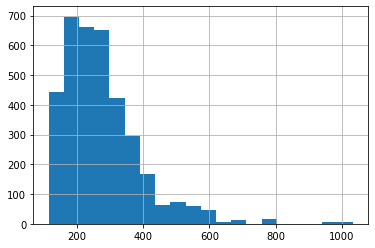

In [46]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)

82091    54.0
82092    54.0
82093    54.0
82094    54.0
82095    54.0
         ... 
94970    29.0
94971    29.0
94972    29.0
96131    25.0
96132    25.0
Name: pullups, Length: 200, dtype: float64